<a href="https://colab.research.google.com/github/Shayshu-NR/APS360-Final-Project/blob/main/APS360_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI APES


Yash IRL: <br>


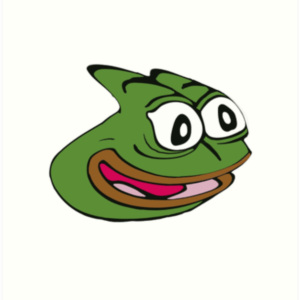

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchtext
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! ls ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d stefanoleone992/imdb-extensive-dataset 

In [ ]:
! unzip /content/imdb-extensive-dataset.zip -d '/root/datasets'

# Baseline Model


Extract the necessary info, clean up the data:

In [10]:
movies = pd.read_csv('/root/datasets/IMDb movies.csv', index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
catcols = ['genre', 'budget', 'country', 'duration', 'year', 'avg_vote']
df = movies[catcols]
not_missing = df.dropna()

In [12]:
not_missing = not_missing[pd.to_numeric(not_missing['year']) > 1980]

In [ ]:
no_foreign = not_missing[not_missing['budget'].str[0] == '$']
no_foreign['budget'] = no_foreign['budget'].str.replace('$', '')

no_foreign['budget'] = no_foreign['budget'].astype('float')
no_foreign['duration'] = no_foreign['duration'].astype('float')
no_foreign['year'] = no_foreign['year'].astype('float')
no_foreign['avg_vote'] = no_foreign['avg_vote'].astype('float')

Normalize the continuous data:

In [ ]:
# Normalize budget
cont_features = no_foreign[['budget', 'duration', 'year', 'avg_vote']]

normalized = no_foreign

normalized['budget']  = (normalized['budget'] - normalized['budget'].min()) / (normalized['budget'].max() - normalized['budget'].min()) 
normalized['duration']  = (normalized['duration'] - normalized['duration'].min()) / (normalized['duration'].max() - normalized['duration'].min()) 
normalized['year']  = (normalized['year'] - normalized['year'].min()) / (normalized['year'].max() - normalized['year'].min()) 
normalized['avg_vote']  = (normalized['avg_vote'] - normalized['avg_vote'].min()) / (normalized['avg_vote'].max() - normalized['avg_vote'].min()) 

In [15]:
normalized_labels  = normalized[['avg_vote']]
normalized = normalized[['genre', 'budget', 'country', 'duration', 'year']]

In [16]:
data = pd.get_dummies(normalized)

In [17]:
datanp = data.values.astype(np.float32)
labelnp = normalized_labels.values.astype(np.float32)

Create training and testing data sets:

In [18]:
np.random.seed(1000)

np.random.shuffle(datanp)
np.random.shuffle(labelnp)

train_index = int(len(datanp) * 0.9)

train_set = datanp[:train_index]
test_set = datanp[train_index:]

train_label = labelnp[:train_index]
test_label = labelnp[train_index:]

Use a premade model to make predictions

In [ ]:
from sklearn import linear_model

model = linear_model.SGDRegressor()
model.fit(train_set, train_label)

result = model.predict(test_set)


accuracy  = 0 
loss = 0
for i in range(len(result)):


  how_close = abs(result[i] - test_label[i])
  
  if how_close < 0.1 :
    accuracy += 1
  
  loss += (how_close)**2.0


print('Testing data performance', 100 * (accuracy / len(result)), '% correctly predicted')
print('Testing data performance', (loss / len(result)), 'Loss')

The testing accuracy of this model was 48.13%, with a mean squared loss of 0.024